## 21 - LCL, LFC, EL

[Youtube](https://www.youtube.com/watch?v=kGljsludKtk)

In [1]:
from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir

In [2]:
df = WyomingUpperAir.request_data(datetime(2012, 4, 14, 12), 'OUN')

In [3]:
from metpy.units import units

In [4]:
p = df['pressure'].values * units(df.units['pressure'])
T = df['temperature'].values * units(df.units['temperature'])
Td = df['dewpoint'].values * units(df.units['dewpoint'])

In [5]:
import metpy.calc as mpcalc

In [6]:
mpcalc.lcl(p[0], T[0], Td[0])

(929.7239421774921 <Unit('hectopascal')>,
 17.543040885876223 <Unit('degree_Celsius')>)

In [7]:
mpcalc.lfc(p, T, Td)

/home/jessica/anaconda3/lib/python3.9/site-packages/metpy/calc/thermo.py:951: UserWarning: Duplicate pressure(s) [17.1 27.1] hPa provided. Output profile includes duplicate temperatures as a result.
  warnings.warn(f'Duplicate pressure(s) {unique[counts > 1]:~P} provided. '


(907.3979126477459 <Unit('hectopascal')>,
 16.64643799968054 <Unit('degree_Celsius')>)

In [8]:
mpcalc.el(p, T, Td)

(193.8839698187692 <Unit('hectopascal')>,
 -62.798473356241274 <Unit('degree_Celsius')>)

In [9]:
lfc_pressure, lfc_temperature = mpcalc.lfc(p, T, Td)

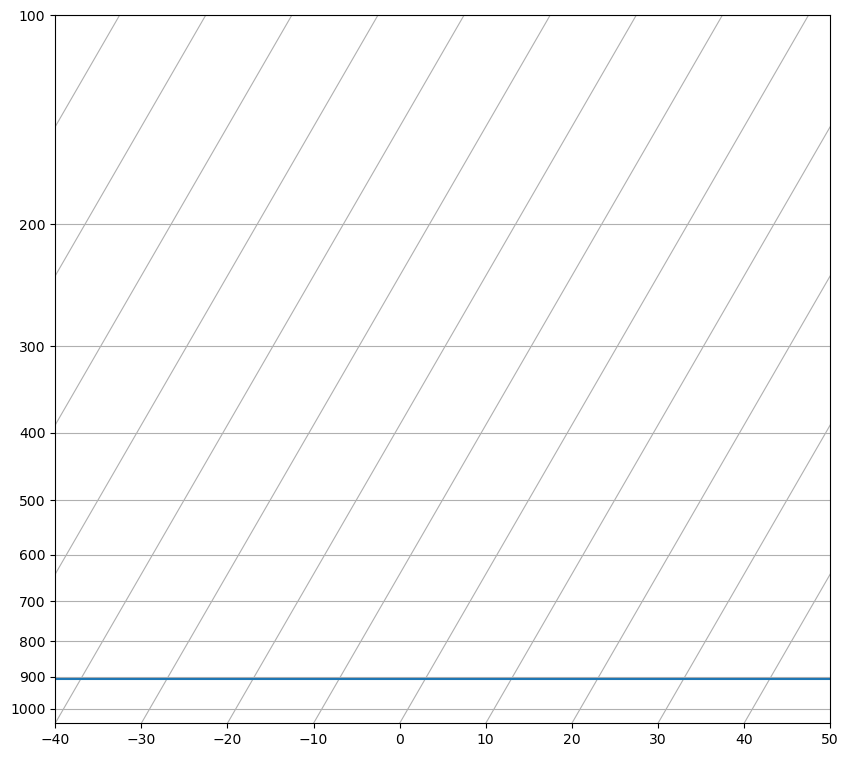

In [10]:
import matplotlib.pyplot as plt
import metpy.plots as plots
fig = plt.figure(figsize = (10, 10))
skew = plots.SkewT(fig)
if lfc_pressure:
 skew.ax.axhline(lfc_pressure)